In [1]:
pan_df = '/home/hermuba/data0118/cdhit/clstr/pangenome_df/Escherichia0.70rm_plasmid.clstr.csv'
from Genome.pangenome_intrinsic_info.count_core_acc import *

In [2]:
count, pan_size, df = gene_distribution(pan_df)

In [3]:
df.shape

(31622, 1580)

Text(0, 0.5, 'gene count')

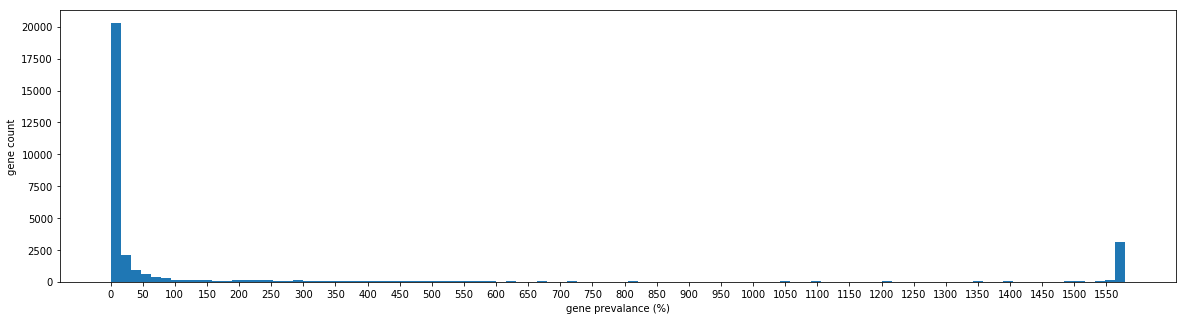

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,5))
n, bins, patches = ax.hist(count, bins = 100)
ax.set_xlabel('gene prevalance (%)')
ax.set_xticks(range(0,1580,50))

ax.set_ylabel('gene count')

In [5]:
bins/pan_size # last bar: 99% of organism has it

array([0.        , 0.00999367, 0.01998734, 0.02998101, 0.03997468,
       0.04996835, 0.05996203, 0.0699557 , 0.07994937, 0.08994304,
       0.09993671, 0.10993038, 0.11992405, 0.12991772, 0.13991139,
       0.14990506, 0.15989873, 0.16989241, 0.17988608, 0.18987975,
       0.19987342, 0.20986709, 0.21986076, 0.22985443, 0.2398481 ,
       0.24984177, 0.25983544, 0.26982911, 0.27982278, 0.28981646,
       0.29981013, 0.3098038 , 0.31979747, 0.32979114, 0.33978481,
       0.34977848, 0.35977215, 0.36976582, 0.37975949, 0.38975316,
       0.39974684, 0.40974051, 0.41973418, 0.42972785, 0.43972152,
       0.44971519, 0.45970886, 0.46970253, 0.4796962 , 0.48968987,
       0.49968354, 0.50967722, 0.51967089, 0.52966456, 0.53965823,
       0.5496519 , 0.55964557, 0.56963924, 0.57963291, 0.58962658,
       0.59962025, 0.60961392, 0.61960759, 0.62960127, 0.63959494,
       0.64958861, 0.65958228, 0.66957595, 0.67956962, 0.68956329,
       0.69955696, 0.70955063, 0.7195443 , 0.72953797, 0.73953

In [7]:
# define core
thres = extended_core(n, bins) # 1563

In [19]:
df.columns[df.sum(axis = 0)<4000] # only ~400 genes; WTF; annotated as WGS in PATRIC, quast NaN!!! WTF, "PacBio"

Index(['562.22426'], dtype='object')

In [20]:
grow = pangenome_profile(df.iloc[:, :100])

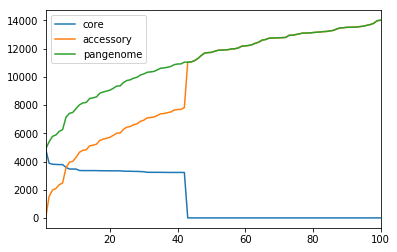

In [23]:
grow.plot()

In [25]:
df.drop(axis = 1, columns = '562.22426', inplace = True)

In [26]:
grow = pangenome_profile(df.iloc[:, :100])

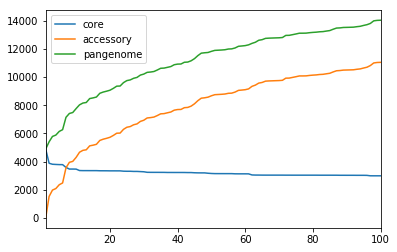

In [27]:
grow.plot()

In [6]:
### calculations related to COG annotation
# count cog
def cog_dis(df): # parse cog
    result = pd.DataFrame(np.zeros((1,26)), columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
    cog = list(df.loc[df['cog'].notnull()]['cog'])
    for str in cog:
        for s in str:
            result[s] += 1
    result['NaN'] = df.shape[0]-len(cog)
    return(result)

# apply count cog to all of them!
import math
cog_seperate = pd.DataFrame(columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    cog_seperate = cog_seperate.append(cog_dis(sub_df), ignore_index = True)

# move legend to side

ax = cog_seperate.plot(kind = 'bar', figsize = (10,5),  stacked=True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("No. of genes")
        

In [9]:
### calculations related to CARD annotation
card_seperate = pd.DataFrame(columns = ['card', 'no card'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    card = sub_df.loc[sub_df['card_count'] > 0].shape[0]
    no_card = sub_df.shape[0]-card
    card_seperate = card_seperate.append({'card':card,'no card': no_card}, ignore_index = True)

ax = card_seperate.plot(kind = 'bar', figsize = (10,5), xticks= card_seperate.index, stacked=True,logy = True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("Log(No. of genes)")                                       
    
fig, ax = plt.subplots()
cluster_detail['card_portion'].hist(bins = 100, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("freqency of containing card gene in a cluster")

fig, ax = plt.subplots()
cluster_detail['card_count'].hist(bins = 10, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("card gene count")

In [13]:
### calculations related to blast annotation
blast = pd.read_pickle("/home/hermuba/resistanceExp/data/blastp_gi_1022")
# not 1, not 0 card
card = cluster_detail.loc[cluster_detail['card_portion']>0]
not_one = card.loc[card['card_portion']<1]
x = pd.merge(not_one, blast, left_on = 'representing gene header', right_index = True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/hermuba/resistanceExp/data/blastp_gi_1022'

In [ ]:
print(plt.style.available)

In [ ]:
ct.plot(xticks = np.arange(1, 59, 1), use_index = False, figsize = (15,10))

In [ ]:
# core and accessory cog difference
core_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']==1])
acc_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']<1])
both_cog = core_cog.append(acc_cog, ignore_index = True)
both = both_cog.rename(index = {0:'core', 1:'accessory'})
both.to_excel("/home/hermuba/resistanceExp/EcoliGenomes/figures/core_acc_cog_distribution.xlsx")

In [ ]:
both_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ax = both_cog.transpose().plot(kind = 'pie', figsize = (10,5),use_index = False, subplots = True, stacked=True, colormap = 'tab20b', legend = False)
ax[0].set_title("core")
ax[1].set_title("accessory")

In [ ]:
both_cog.sum(axis = 1)

In [ ]:
freq_cog = both_cog
freq_cog.iloc[0,:] = both_cog.iloc[0,:]/2922
freq_cog.iloc[1,:] = both_cog.iloc[1,:]/13468


In [ ]:
(freq_cog.iloc[0,:]/freq_cog.iloc[1,:]).sort_values()

In [ ]:
freq_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
eli_nan = both_cog.iloc[:, 0:25] # 2573, 5840
eli_nan.sum(axis = 1)

In [ ]:
eli_nan.sum(axis = 1)
elif_cog = eli_nan
elif_cog.iloc[0,:] = both_cog.iloc[0,:]/2673
elif_cog.iloc[1,:] = both_cog.iloc[1,:]/5840


In [ ]:
(elif_cog.iloc[0,:]/elif_cog.iloc[1,:]).sort_values()

In [ ]:
elif_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
elif_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
elif_cog.transpose().plot(kind = 'pie', figsize = (10,5), subplots = True, stacked=True, colormap = 'tab20b', legend = False)